# Convolutional Neural Networks with TensorFlow on CIFAR10 Dataset

In [1]:
import tensorflow as tf
import keras 
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (50000, 32, 32, 3)
X_test.shape:  (10000, 32, 32, 3)
y_train.shape:  (50000, 1)
y_test.shape:  (10000, 1)


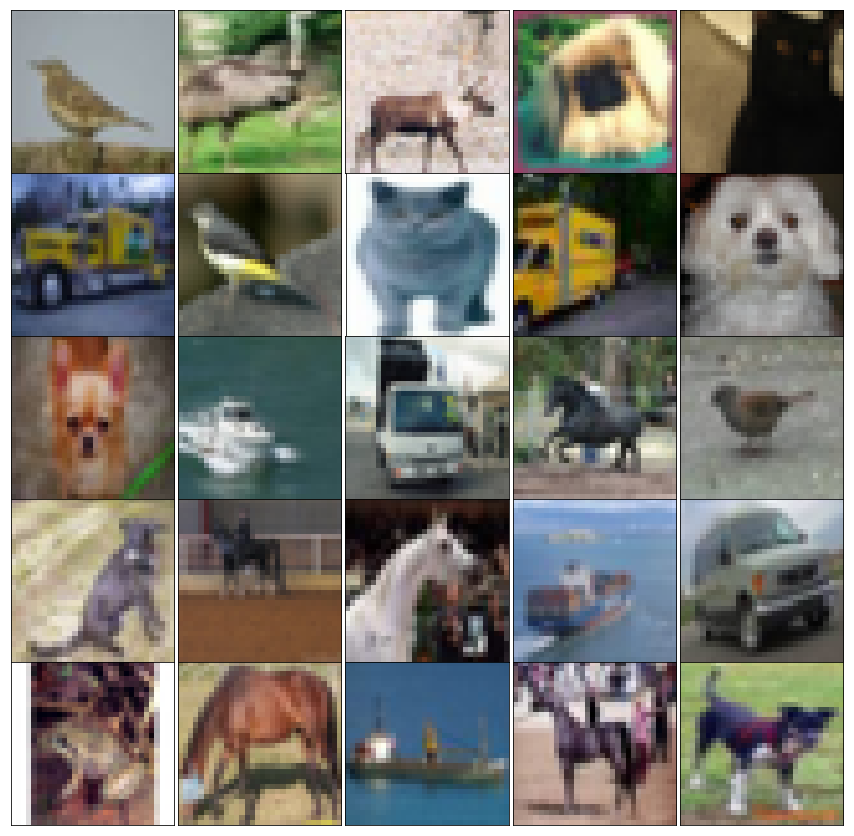

In [4]:
image_index = np.random.choice(50000, size=25, replace=False)
fig, axes = plt.subplots(5, 5, figsize=(15, 15), squeeze=True, gridspec_kw=dict(wspace=0, hspace=0))

for index, ax in zip(image_index, axes.ravel()):
    ax.imshow(X_train[index])
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [5]:
# ============= preprocess the data =================
# labels to categorical
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)
print("Maximum on X_train: {}, Minimum on X_train: {}".format(X_train.max(), X_train.min()))
print("Maximum on X_test: {}, Minimum on X_test: {}".format(X_test.max(), X_test.min()))

X_train.shape:  (50000, 32, 32, 3)
X_test.shape:  (10000, 32, 32, 3)
y_train.shape:  (50000, 1)
y_test.shape:  (10000, 1)
Maximum on X_train: 255, Minimum on X_train: 0
Maximum on X_test: 255, Minimum on X_test: 0


In [0]:
# =========== defining the functions ===============
def weigth_variable(shape):
    initial = tf.truncated_normal(shape=shape, stddev=0.3)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(value=0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pooling_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

def conv_layer(input, shape):
    W = weigth_variable(shape)
    b = bias_variable([shape[3]])
    return tf.nn.relu(conv2d(input, W) + b)

def flatten(x):
    return tf.reshape(x, shape=[-1, x.shape[1]*x.shape[2]*x.shape[3]])

def full_layer(input, size):
    input_size = int(input.get_shape()[1])
    W = weigth_variable([input_size, size])
    b = bias_variable([size])
    return tf.matmul(input, W) + b

In [7]:
# ============ the architecture ============
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y_true = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)

conv1 = conv_layer(x, shape=[5, 5, 3, 32])
conv1_pool = max_pooling_2x2(conv1)

conv2 = conv_layer(conv1_pool, shape=[5, 5, 32, 64])
conv2_pool = max_pooling_2x2(conv2)
conv2_flat = flatten(conv2_pool)

full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))
full_1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)

y_pred = full_layer(full_1_drop, 10)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
LEARNING_RATE = 0.001
NUM_BATCHES = 1000
EPOCHS = 100

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y_pred))

train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_index = np.split(np.arange(X_train.shape[0]), NUM_BATCHES)

    for epoch in range(EPOCHS):
        percentage = 0

        print("Epoch {}:".format(epoch+1))

        for batch in range(NUM_BATCHES):
            batch_X = X_train[batch_index[batch]]
            batch_Y = Y_train[batch_index[batch]]
            if batch%int(NUM_BATCHES/10) == 0:
                train_accuracy = sess.run(accuracy, feed_dict={x: batch_X,
                                                               y_true: batch_Y,
                                                               keep_prob: 1.01})
                print("Process {}%, training accuracy = {}".format(percentage, train_accuracy))
                percentage += 10

            sess.run(train_step, feed_dict={x: batch_X,
                                            y_true: batch_Y,
                                            keep_prob: 0.5})
        train_accuracy = sess.run(accuracy, feed_dict={x: batch_X, 
                                                           y_true: batch_Y,
                                                           keep_prob: 1.0})
        print("Process {}%, training accuracy = {}".format(percentage, train_accuracy))
        print()

Epoch 1:
Process 0%, training accuracy = 0.11999999731779099
Process 10%, training accuracy = 0.23999999463558197
Process 20%, training accuracy = 0.18000000715255737
Process 30%, training accuracy = 0.1599999964237213
Process 40%, training accuracy = 0.1599999964237213
Process 50%, training accuracy = 0.07999999821186066
Process 60%, training accuracy = 0.10000000149011612
Process 70%, training accuracy = 0.07999999821186066
Process 80%, training accuracy = 0.07999999821186066
Process 90%, training accuracy = 0.07999999821186066
Process 100%, training accuracy = 0.1599999964237213

Epoch 2:
Process 0%, training accuracy = 0.1599999964237213
Process 10%, training accuracy = 0.11999999731779099
Process 20%, training accuracy = 0.05999999865889549
Process 30%, training accuracy = 0.14000000059604645
Process 40%, training accuracy = 0.05999999865889549
Process 50%, training accuracy = 0.10000000149011612
Process 60%, training accuracy = 0.1599999964237213
Process 70%, training accuracy = 

KeyboardInterrupt: ignored

In [12]:
import tensorflow as tf
import keras
import numpy as np


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')


def conv_layer(input, shape):
    W = weight_variable(shape)
    b = bias_variable([shape[3]])
    return tf.nn.relu(conv2d(input, W) + b)


def full_layer(input, size):
    in_size = int(input.get_shape()[1])
    W = weight_variable([in_size, size])
    b = bias_variable([size])
    return tf.matmul(input, W) + b


(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)

conv1 = conv_layer(x, shape=[5, 5, 3, 32])
conv1_pool = max_pool_2x2(conv1)

conv2 = conv_layer(conv1_pool, shape=[5, 5, 32, 64])
conv2_pool = max_pool_2x2(conv2)

conv3 = conv_layer(conv2_pool, shape=[5, 5, 64, 128])
conv3_pool = max_pool_2x2(conv3)
conv3_flat = tf.reshape(conv3_pool, [-1, 4 * 4 * 128])
conv3_drop = tf.nn.dropout(conv3_flat, keep_prob=keep_prob)

full_1 = tf.nn.relu(full_layer(conv3_drop, 512))
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)

y_conv = full_layer(full1_drop, 10)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv,
                                                                        labels=y_))
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

NUM_BATCHES = 1000
EPOCHS = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_index = np.split(np.arange(X_train.shape[0]), NUM_BATCHES)

    for epoch in range(EPOCHS):
        percentage = 0
        print("Epoch {}:".format(epoch+1))

        for batch in range(NUM_BATCHES):
            batch_X = X_train[batch_index[batch]]
            batch_Y = Y_train[batch_index[batch]]
            if batch%int(NUM_BATCHES/10) == 0:
                train_accuracy = sess.run(accuracy, feed_dict={x: batch_X,
                                                               y_: batch_Y,
                                                               keep_prob: 1.0})
                print("Process {}%, training accuracy = {}".format(percentage, train_accuracy))
                percentage += 10

            sess.run(train_step, feed_dict={x: batch_X,
                                            y_: batch_Y,
                                            keep_prob: 0.5})
        train_accuracy = sess.run(accuracy, feed_dict={x: batch_X, 
                                                           y_: batch_Y,
                                                           keep_prob: 1.0})
        print("Process {}%, training accuracy = {}".format(percentage, train_accuracy))
        print()

Epoch 1:
Process 0%, training accuracy = 0.10000000149011612
Process 10%, training accuracy = 0.18000000715255737
Process 20%, training accuracy = 0.05999999865889549
Process 30%, training accuracy = 0.05999999865889549
Process 40%, training accuracy = 0.10000000149011612
Process 50%, training accuracy = 0.10000000149011612
Process 60%, training accuracy = 0.11999999731779099
Process 70%, training accuracy = 0.07999999821186066
Process 80%, training accuracy = 0.07999999821186066
Process 90%, training accuracy = 0.05999999865889549
Process 100%, training accuracy = 0.14000000059604645

Epoch 2:
Process 0%, training accuracy = 0.03999999910593033
Process 10%, training accuracy = 0.07999999821186066
Process 20%, training accuracy = 0.10000000149011612
Process 30%, training accuracy = 0.019999999552965164
Process 40%, training accuracy = 0.10000000149011612
Process 50%, training accuracy = 0.10000000149011612
Process 60%, training accuracy = 0.11999999731779099
Process 70%, training accur

KeyboardInterrupt: ignored